In [3]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

# 線性迴歸(Linear Regression)
## Least Square Method (最小平方法)
 假設一個地區的房價與坪數是呈線性關係，並以下圖中的三個點表示。如果我們想透過房子的坪數來預測房價，那麼我們的目標就是找到一條直線，並與座標平面上這三個點的差距越小越好。那這條直線該怎麼找呢？首先我們隨機找一條直線，並計算這三點的 loss。損失函數可以自己定義，假設我們使用 MSE 均方誤差來計算。透過一系列計算我們得到一個 loss 即為 MSE 值。接著我們將這個直線稍稍的轉一個角度後又可以計算一個新的 MSE，此刻我們可以發現 MSE 值又比剛剛更小了。也就是說這一條新的直線能夠更法應出訓練集中 A、B、C 的數據點所反映的房屋坪數與房價之間的線性關係。
 
<img src="./image/img8-1.png" width=500>
 
 簡單來說我們在一個二維空間中，我們可以找到無數條直線。現在我們能做的事情就是從這無數條直線中選出一條最佳的當作我們的預測模型，同時它面對這三點的誤差是要最小的。因此我們的目標就是要最小化 MSE 也就是所謂的損失函數 (loss function)。所以整個線性回歸的目標就是最小化我們的損失函數，其中一個解法就是最小平方法。因為 MSE 等於 1/n 倍的残差平方和 (RSS)，其中分母 n 為常數，不影響極小化故拿掉。因此最終的求解是滿足最小化平方和，使其最小化。經過數學推導後，簡化的公式如下：

 ![](./image/img8-2.png)


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


NameError: name 'myfont' is not defined

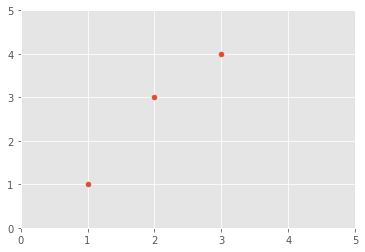

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 亂數產生資料
np.random.seed(0)
noise = np.random.rand(100, 1)
x = [1, 2 ,3]
y = [1, 3, 4]
# y=ax+b Target function  a=3, b=15


# plot
plt.scatter(x,y,s=25)
plt.xticks(np.arange(0, 6, 1))
plt.yticks(np.arange(0, 6, 1))

plt.xlabel('房屋坪數/坪', fontproperties=myfont)
plt.ylabel('房價/十萬元', fontproperties=myfont)
plt.show()

### 範例程式 (房價預測)

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

# 載入 Sklearn 房價預測資料集 13個輸入特徵 1個輸出特徵
boston_dataset = load_boston()
# 輸入特徵共13個
X = boston_dataset.data
# 設定截距項 b 權重值為 1 
b=np.ones((X.shape[0], 1))
# 添加常數項特徵，最終有 13+1 個輸入特徵
X=np.hstack((X, b))
# 輸出(房價)
y = boston_dataset.target

# 計算 Beta (@ 為 numpy 中 2-D arrays 的矩陣乘法)
Beta = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred = X @ Beta

print('MSE:', mean_squared_error(y_pred, y))

MSE: 21.8948311817292


In [3]:
# 取得13個特徵係數+截距
Beta

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01,  3.64594884e+01])

## Sklearn LinearRegression模型
1.LinearRegression object uses Ordinary Least Squares solver from scipy, as LR is one of two classifiers which have closed form solution. Despite the ML course - you can actually learn this model by just inverting and multiplicating some matrices.

2.SGDRegressor which is an implementation of stochastic gradient descent, very generic one where you can choose your penalty terms. To obtain linear regression you choose loss to be L2 and penalty also to none (linear regression) or L2 (Ridge regression)

## 

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

# 載入 Sklearn 房價預測資料集 13個輸入特徵 1個輸出特徵
boston_dataset = load_boston()
# 輸入特徵共13個
X = boston_dataset.data
# 輸出(房價)
y = boston_dataset.target

# 訓練模型
linearModel = LinearRegression()
linearModel.fit(X, y)

y_pred = linearModel.predict(X)
mean_squared_error(y_pred, y)

21.894831181729202

In [9]:
# 取得13個特徵係數
linearModel.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [10]:
# 取得截距
linearModel.intercept_

36.459488385089855

## 多項式的回歸模型 (PolynomialFeatures)
上面的例子資料都很均勻分布在一條直線上，但現實的資料可能並只會發生在一條線上。下面示範一個多項次的回歸模型例子。

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
plt.style.use('seaborn')

# make_pipeline是指可以將多個Sklearn的function一起執行
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

# 隨機定義新的x,y值
def make_data(N,err=1,rseed=42):
    rng=np.random.RandomState(rseed)
    x = rng.rand(N,1)**2
    y = 10-1/(x.ravel()+0.1)
    if err>0:
        y+=err*rng.randn(N)
    return x,y

X, y = make_data(100)

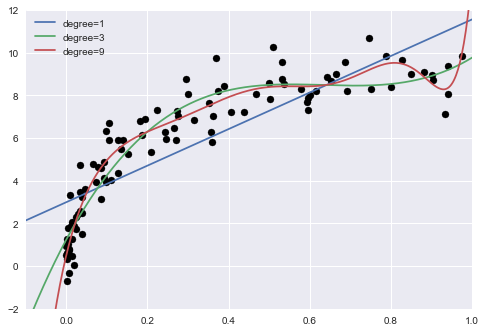

In [12]:
# 測試資料集
x_test = np.linspace(-0.1,1.1,500)[:,None]
# 繪製真實答案的分佈
plt.scatter(X.ravel(),y,color='black')

# 測試 1,3,7 的degree
for degree in [1,3,9]:
    y_test=PolynomialRegression(degree).fit(X,y).predict(x_test)
    plt.plot(x_test.ravel(),y_test,label='degree={}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')

In [13]:
x = np.array([[1.40280301e-01],[9.03857692e-01],[5.35815131e-01],[3.58391981e-01],[2.43418162e-02],[2.43342904e-02],[3.37370600e-03],[7.50261116e-01],[3.61339257e-01],[5.01366775e-01],[4.23721405e-04],[9.40725121e-01],[6.92960750e-01],[4.50878979e-02],[3.30603187e-02],[3.36372142e-02],[9.25633424e-02],[2.75369313e-01],[1.86576499e-01],[8.48144121e-02],[3.74363965e-01],[1.94585372e-02],[8.53484957e-02],[1.34221000e-01],[2.07999831e-01],[6.16501290e-01],[3.98696193e-02],[2.64437058e-01],[3.50955021e-01],[2.15764084e-03],[3.69110747e-01],[2.90784768e-02],[4.23170975e-03],[9.00383763e-01],[9.32445223e-01],[6.53506272e-01],[9.27895484e-02],[9.53984185e-03],[4.68174835e-01],[1.93734218e-01]])
y = np.array([ 5.82469676e+00,  7.94613194e+00,  9.24976070e+00,  6.59761731e+00,
        2.16651685e+00, -2.50365745e-03, -1.00182588e+00,  9.02075194e+00,
        8.57086436e+00,  8.50848958e+00, -7.34549241e-02,  8.73802779e+00,
        7.26038154e+00,  2.38778217e+00,  2.02397265e+00,  3.57417666e+00,
        5.15052189e+00,  5.57291682e+00,  6.83461431e+00,  4.20408429e+00,
        7.21499207e+00,  2.24057093e+00,  5.63575746e+00,  6.66180813e+00,
        5.91402744e+00,  8.29511673e+00,  3.18174801e+00,  8.23158707e+00,
        7.30330971e+00,  2.55480191e-02,  6.76197223e+00,  1.05656839e+00,
        1.21851645e+00,  1.03566236e+01,  8.95941549e+00,  9.67640393e+00,
        5.17463285e+00,  2.25781800e-01,  8.60137397e+00,  8.13359834e+00])

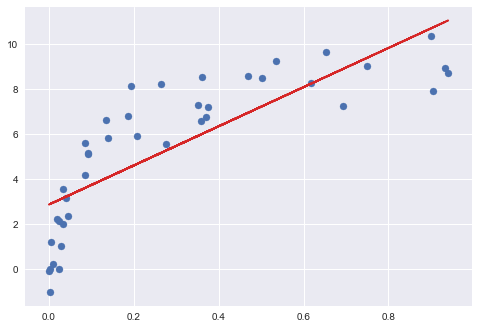

In [14]:
plt.style.use('seaborn')
model = LinearRegression()
model.fit(x,y)
yfit = model.predict(x)
plt.scatter(x,y)
plt.plot(x, yfit, color="#d62728")

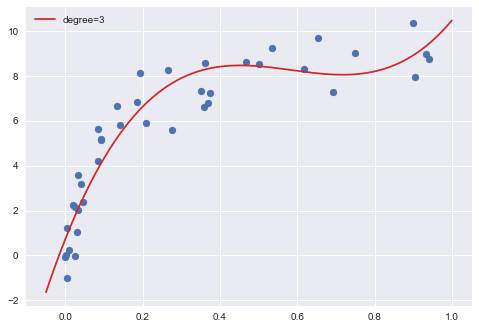

In [15]:
#測試資料集
x_test = np.linspace(-0.05,1,500)[:,None]
y_test=PolynomialRegression(3).fit(x,y).predict(x_test)
plt.scatter(x,y)
plt.plot(x_test.ravel(),y_test,label='degree={}'.format(3), color="#d62728")
plt.legend(loc='best')

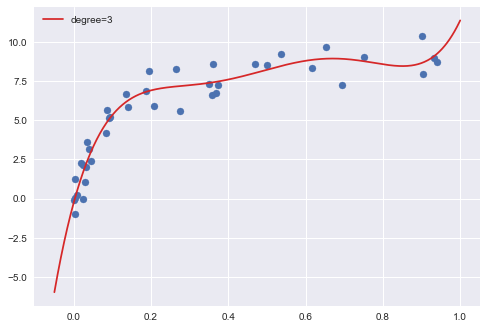

In [20]:
poly = np.polyfit(x.reshape(-1), y, deg=5)

#測試資料集
x_test = np.linspace(-0.05,1,500)[:,None]
y_test=np.polyval(poly, x_test)
plt.scatter(x,y)
plt.plot(x_test.ravel(),y_test,label='degree={}'.format(3), color="#d62728")
plt.legend(loc='best')

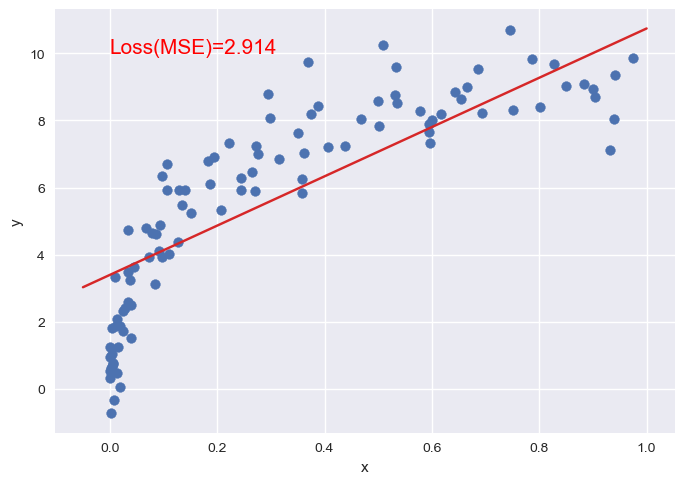

In [252]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# 隨機產生一個特徵的X與輸出y
X, y = make_data(100)

# 建立 SGDRegressor 並設置超參數
regModel = SGDRegressor(max_iter=1000)
# 訓練模型
regModel.fit(X, y)
# 建立測試資料
x_test = np.linspace(-0.05,1,500)[:,None]
# 預測測試集
y_test=regModel.predict(x_test)
# 預測訓練集
y_pred=regModel.predict(X)
# 視覺化預測結果
plt.scatter(X,y)
plt.plot(x_test.ravel(),y_test, color="#d62728")
plt.xlabel('x')
plt.ylabel('y')
plt.text(0, 10, 'Loss(MSE)=%.3f' % mean_squared_error(y_pred, y), fontdict={'size': 15, 'color':  'red'})
# plt.savefig('./image/img8-13.png')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
No handles with labels found to put in legend.


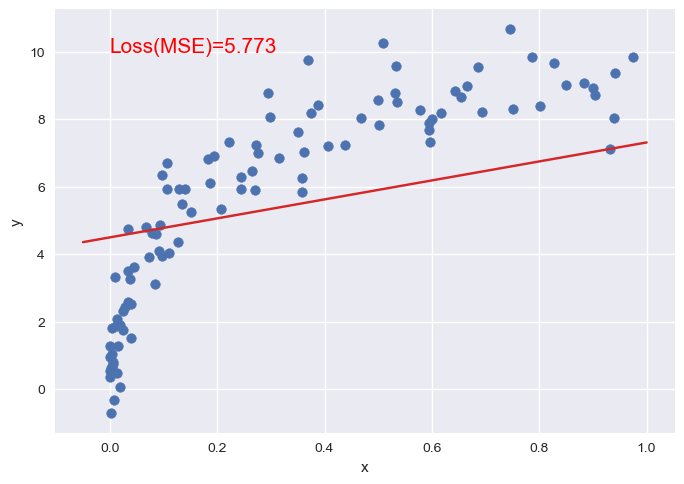

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
No handles with labels found to put in legend.


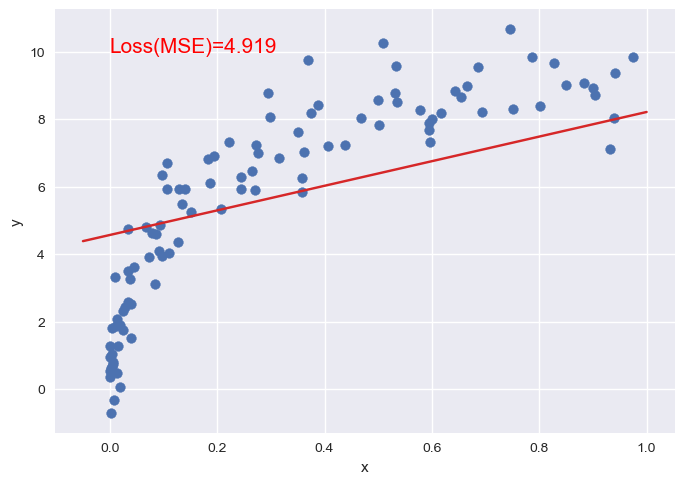

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
No handles with labels found to put in legend.


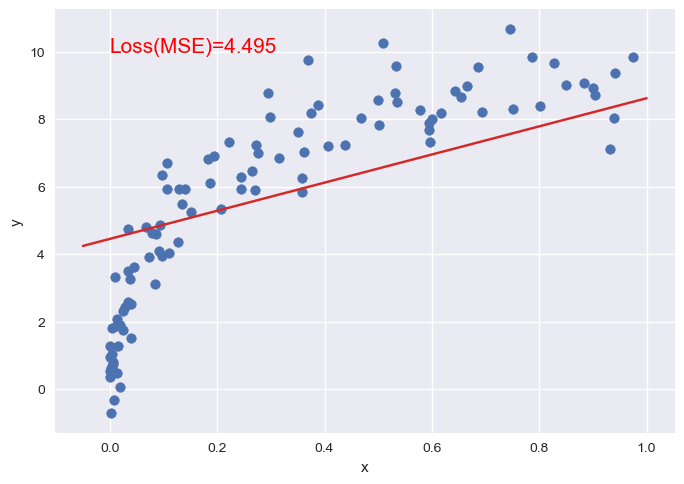

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
No handles with labels found to put in legend.


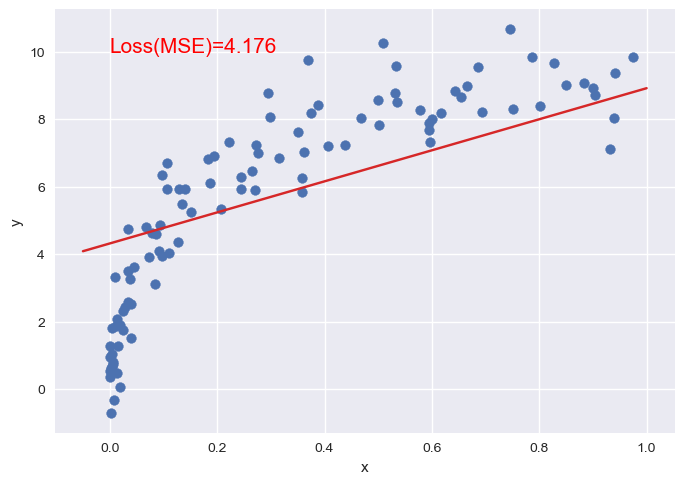

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
No handles with labels found to put in legend.


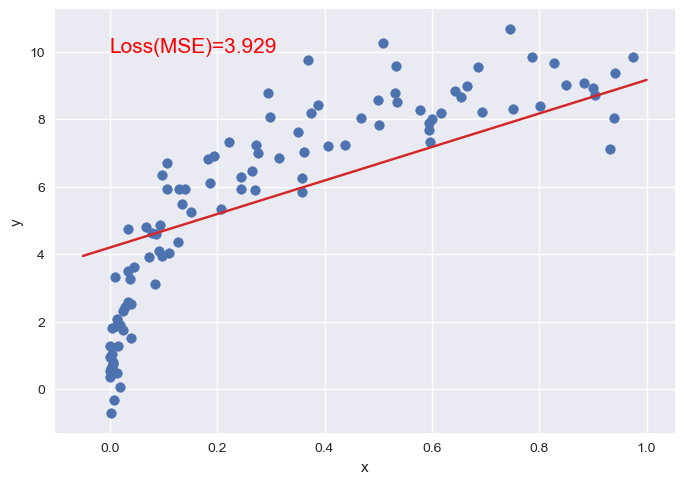

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
No handles with labels found to put in legend.


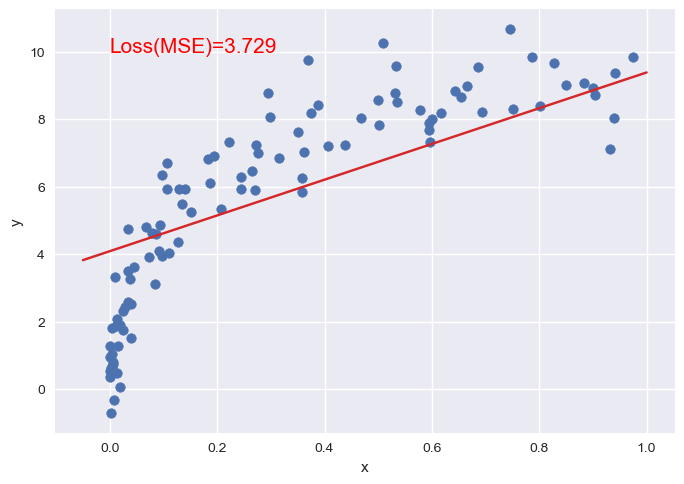

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
No handles with labels found to put in legend.


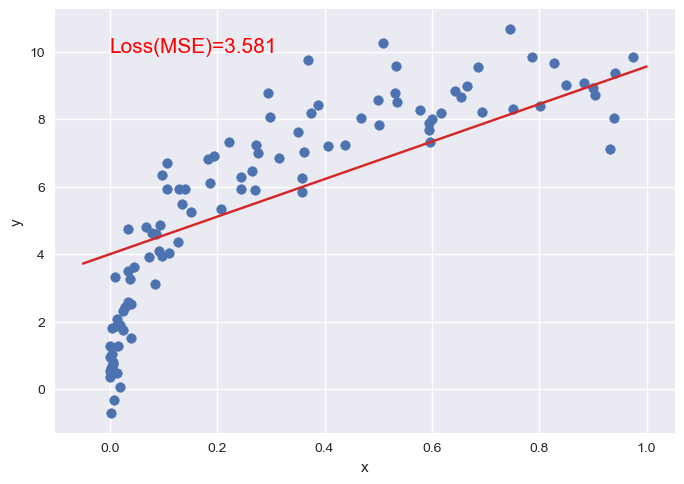

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
No handles with labels found to put in legend.


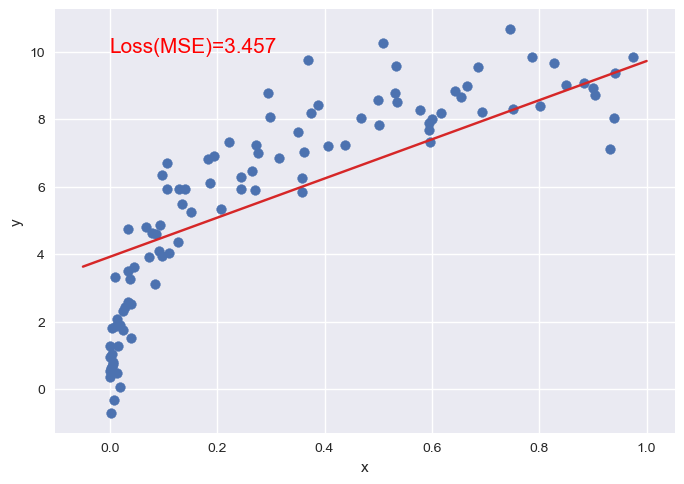

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
No handles with labels found to put in legend.


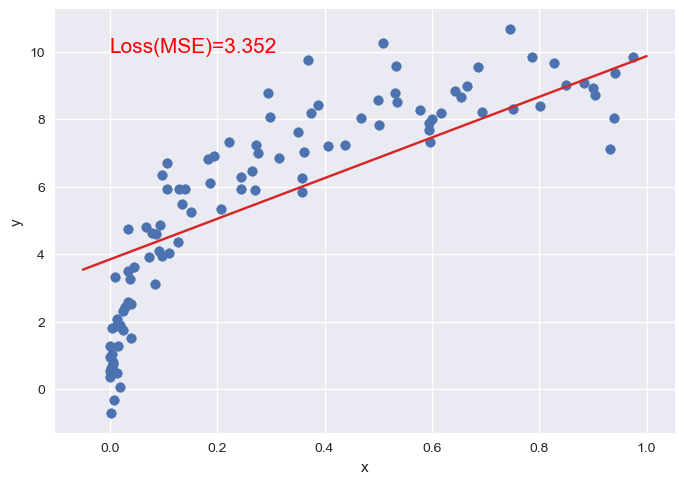

In [243]:
index=9
for i in range(10,100,10):
    reg = SGDRegressor(max_iter=i)
    reg.fit(X, y)
    x_test = np.linspace(-0.05,1,500)[:,None]
    y_test=reg.predict(x_test)
    y_pred=reg.predict(X)
    plt.scatter(X,y)
    plt.plot(x_test.ravel(),y_test, color="#d62728")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.text(0, 10, 'Loss(MSE)=%.3f' % mean_squared_error(y_pred, y), fontdict={'size': 15, 'color':  'red'})
    plt.legend(loc='best')
    plt.savefig('./screenshot/'+str(index)+".png")
    index=index+1
    plt.show()


In [ ]:
""